## Initial testing on Oracle instance at NCSA
* indexing is with DiaObjectLast table
* we have both SSD and spinning disks on the instance (tablespaces LSST_ALERTS_SSD and LSST_ALERTS_SPIN), default tablespace is LSST_ALERTS_SPIN
* `ap_proto` is running on lsst-dev machine which is typically not overloaded

In [1]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

import plots

## First test with 5x5 tiles

* Tables created in default tablespace (which was supposed to be LSST_ALERTS_SSD but in reality was LSST_ALERTS_SPIN).
* 5x5 tiling
* `ap_proto` CPU consumption was very low

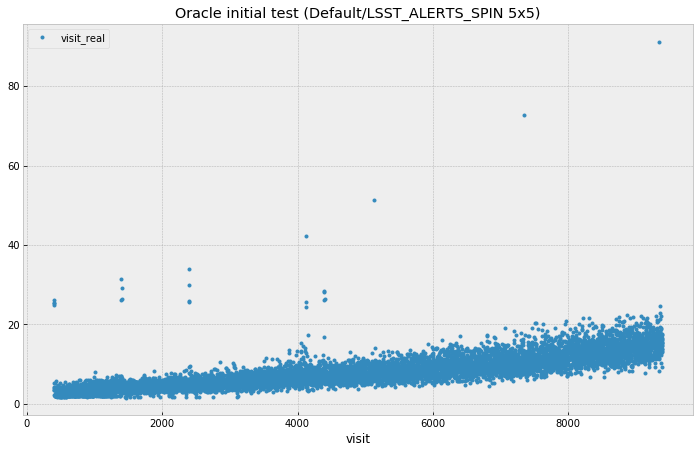

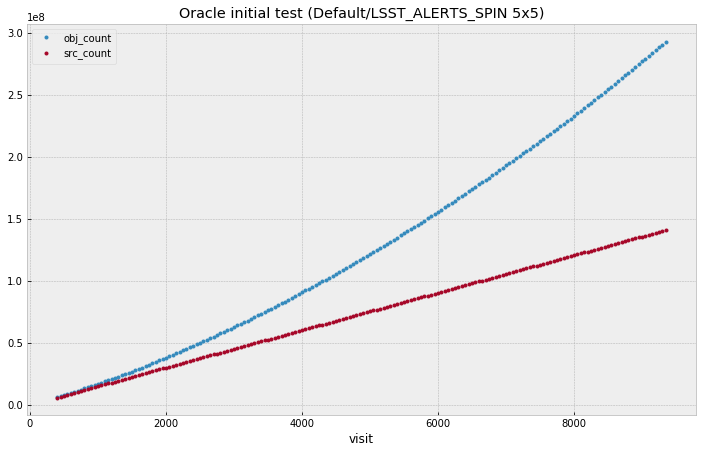

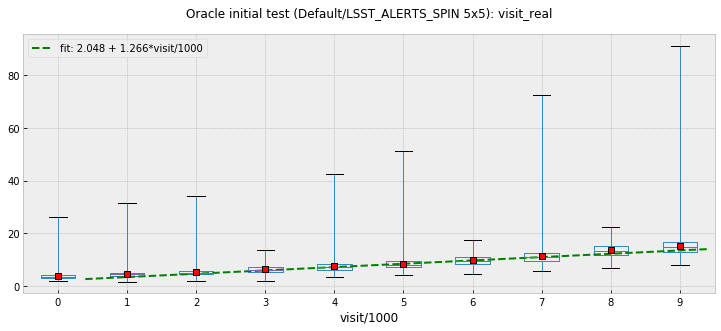

In [2]:
ds = plots.do_plots("data/dm-14712-oracle-hdd-5x5.csv.gz", "Oracle initial test (Default/LSST_ALERTS_SPIN 5x5)",
                    bin=1000, filter_count=True)

## Single process test with SSD
* here we switch to explicit SSD tablespace
* No tiling to see how fast single process runs
* Detailed timing was not enabled for this run

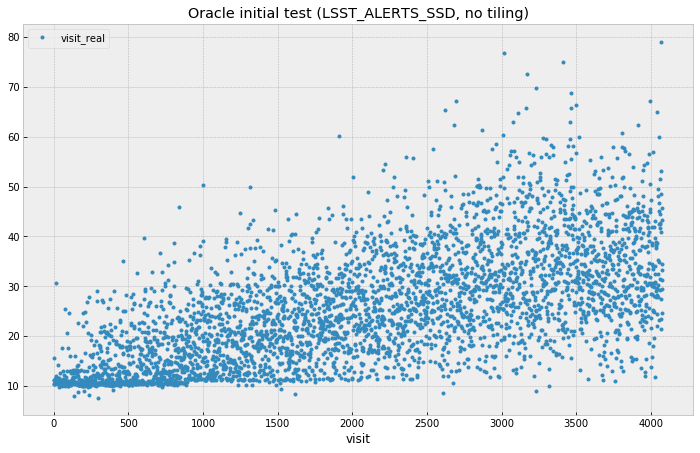

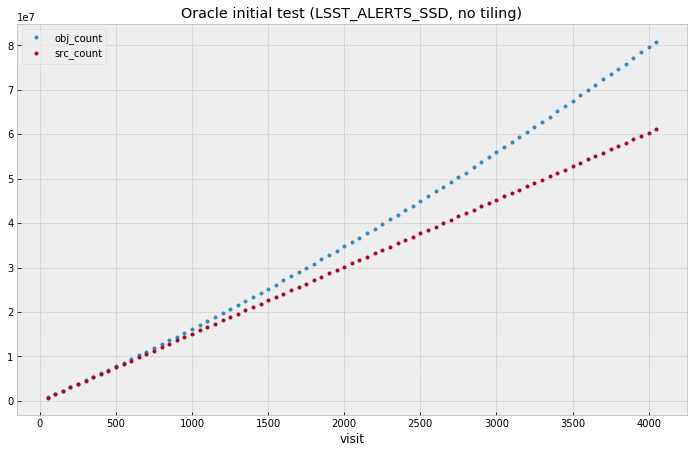

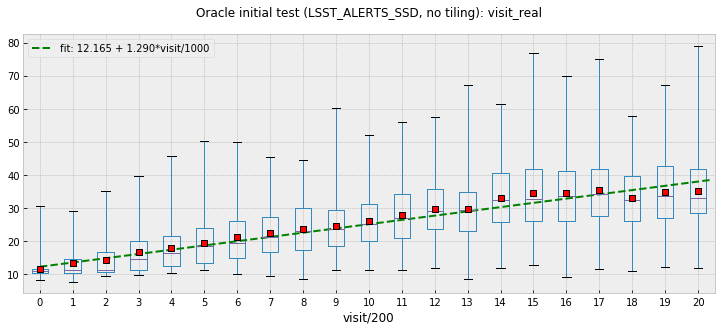

In [3]:
ds = plots.do_plots("data/dm-14712-oracle-ssd-1x1.csv.gz", "Oracle initial test (LSST_ALERTS_SSD, no tiling)",
                    bin=200, filter_count=True)

## 5x5 tiles on SSD
* switching to 5x5 tiles on LSST_ALERTS_SSD tablespace
* again CPU consumption is teribly low

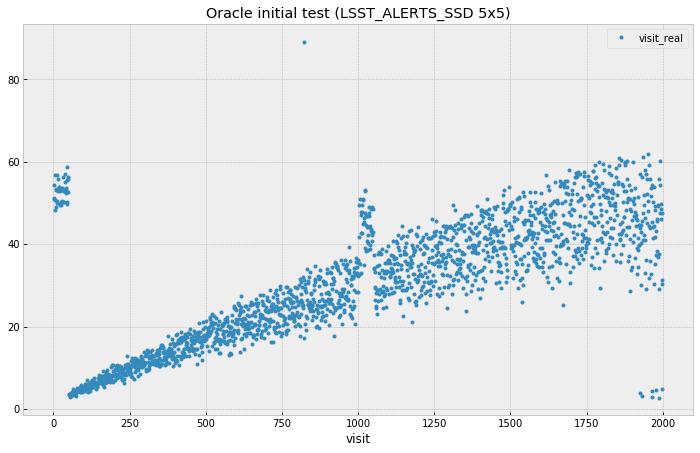

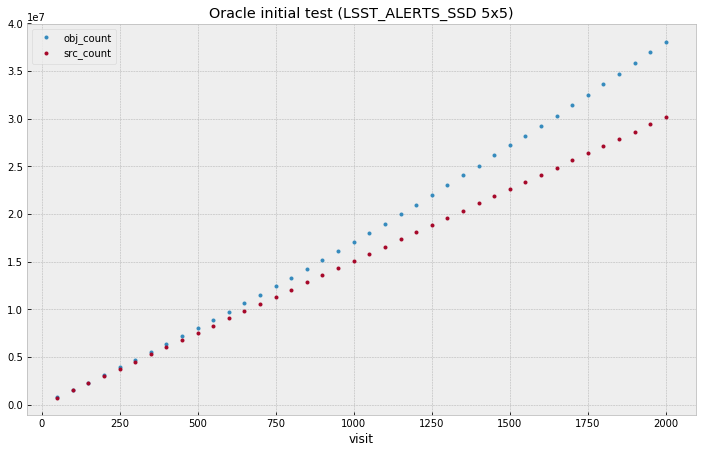

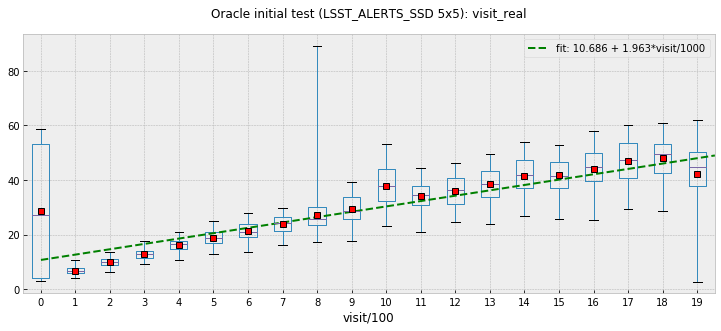

In [4]:
ds = plots.do_plots("data/dm-14712-oracle-ssd-5x5.csv.gz", "Oracle initial test (LSST_ALERTS_SSD 5x5)",
                    bin=100, filter_count=True, bad_visits=[1073])

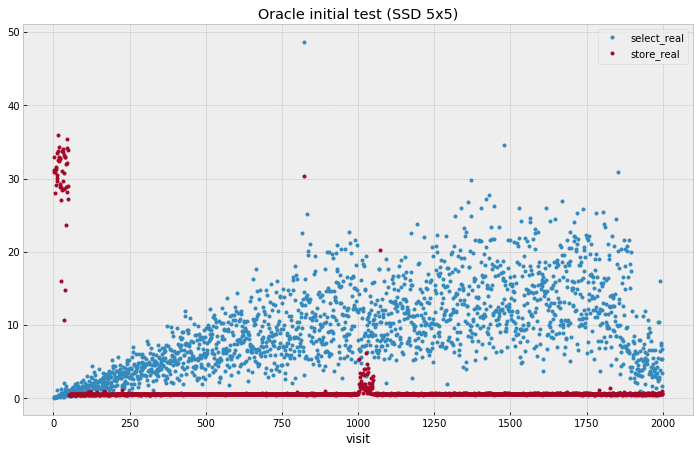

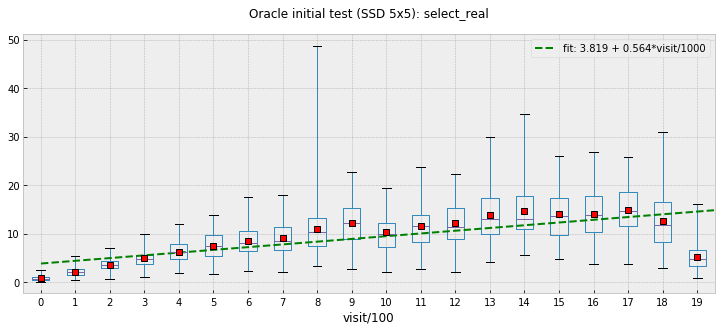

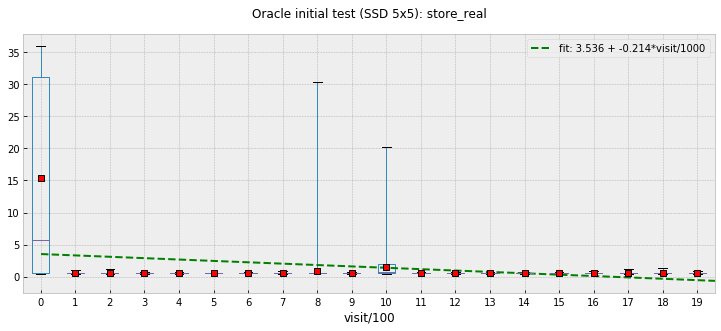

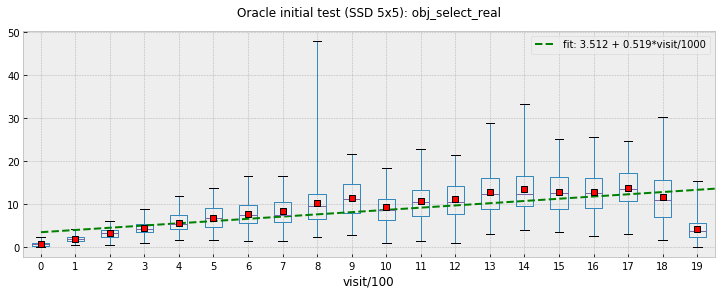

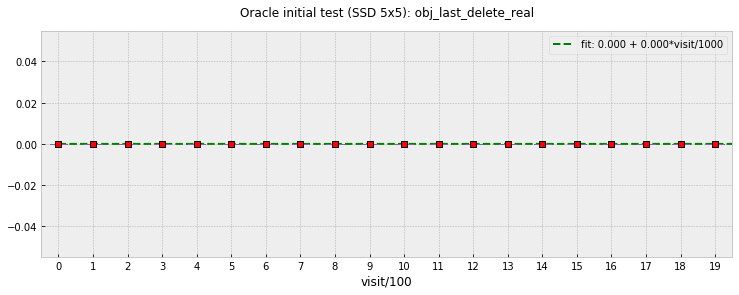

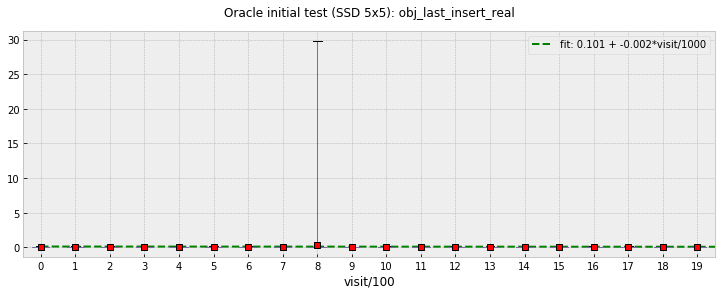

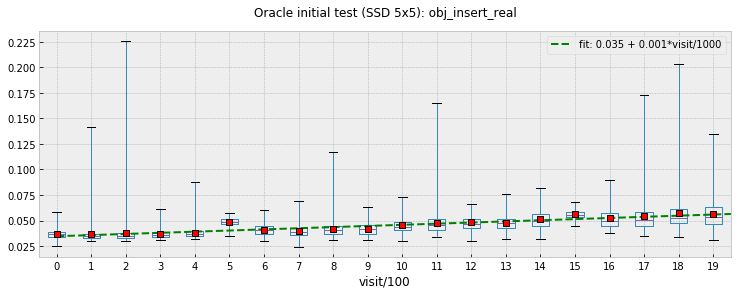

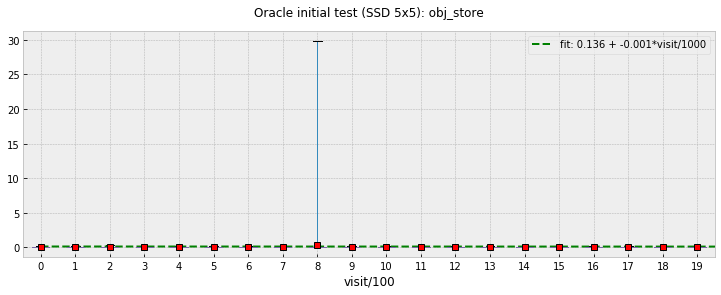

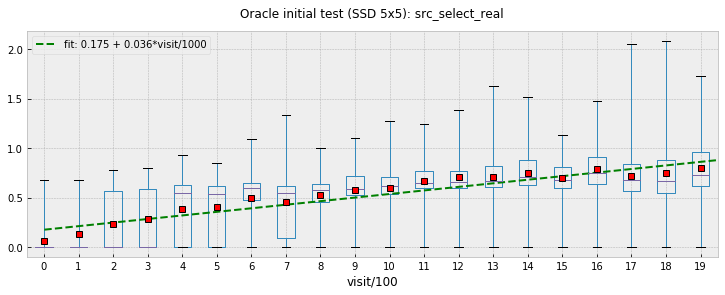

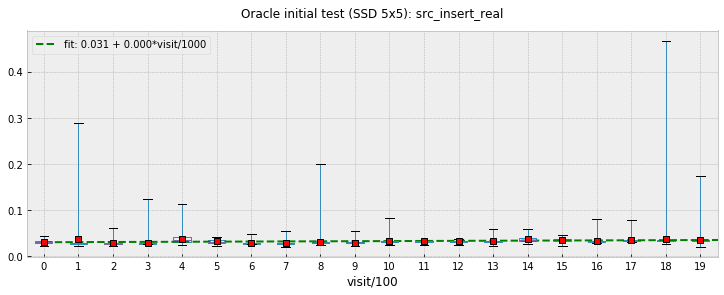

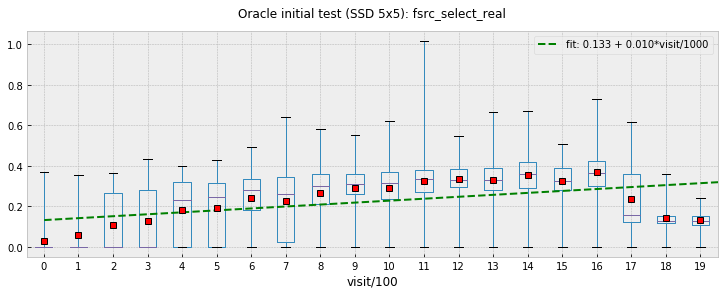

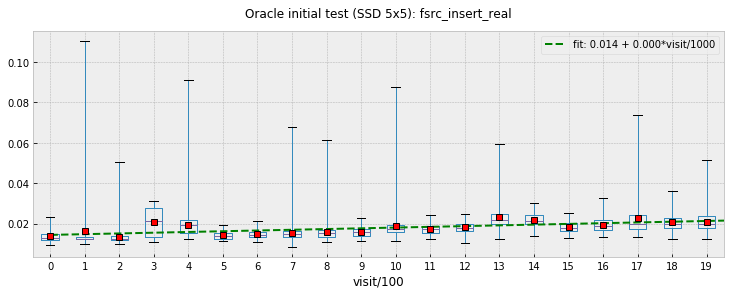

In [5]:
ds = plots.do_plots_all("data/dm-14712-oracle-ssd-5x5.csv.gz", "Oracle initial test (SSD 5x5)",
                        bin=100, filter_count=True)

## 5x5 test on spinning disks
* switching back to LSST_ALERTS_SPIN (explicit)

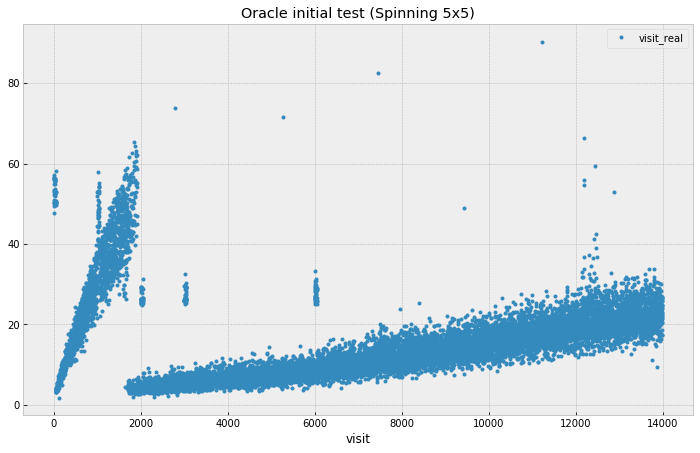

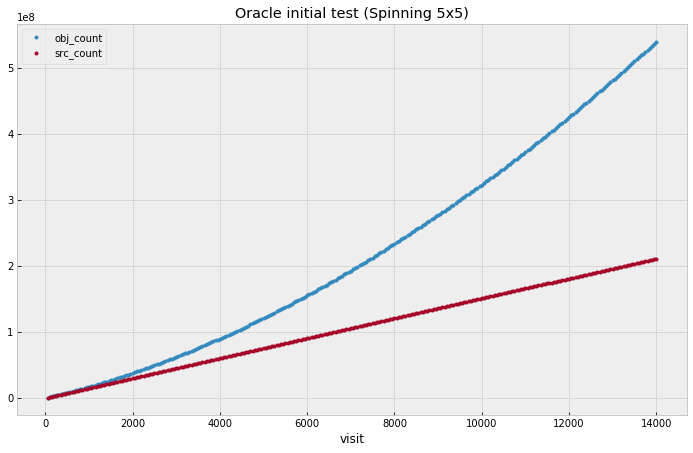

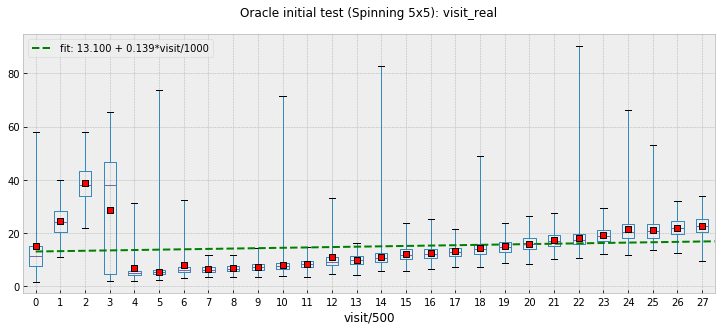

In [6]:
ds = plots.do_plots("data/dm-14712-oracle-spin-5x5.csv.gz", "Oracle initial test (Spinning 5x5)",
                    bin=500, filter_count=True, bad_visits=[51])

### Same dataset, more detailed plots

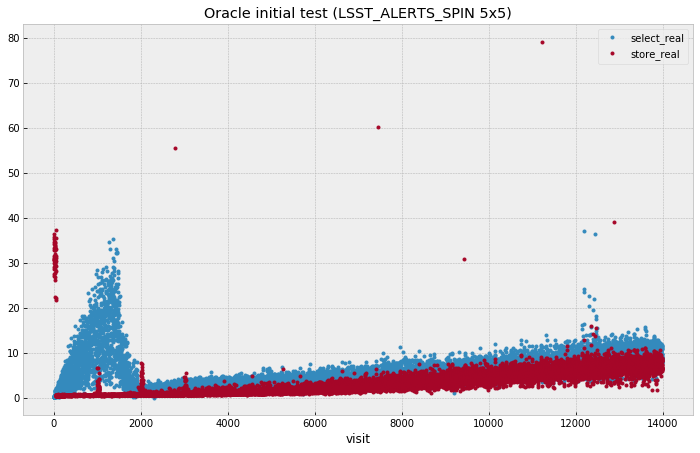

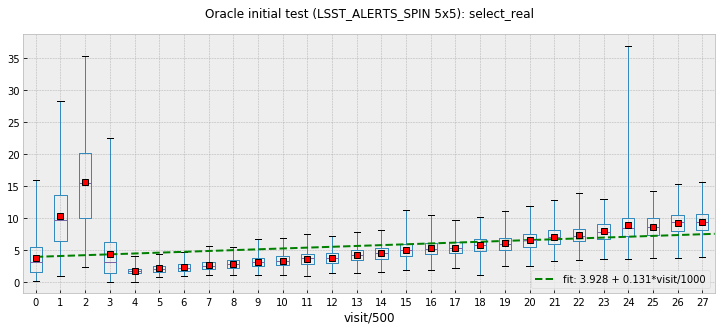

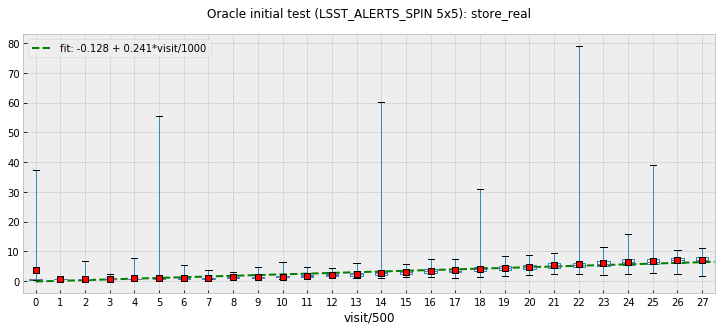

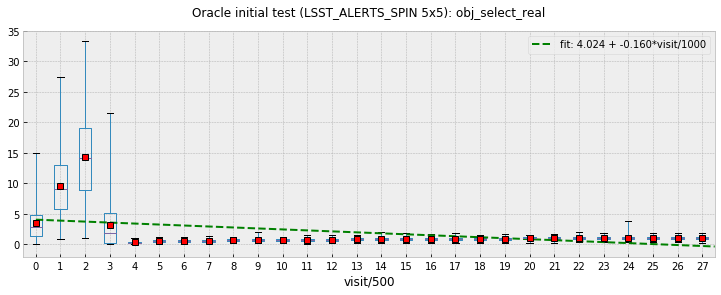

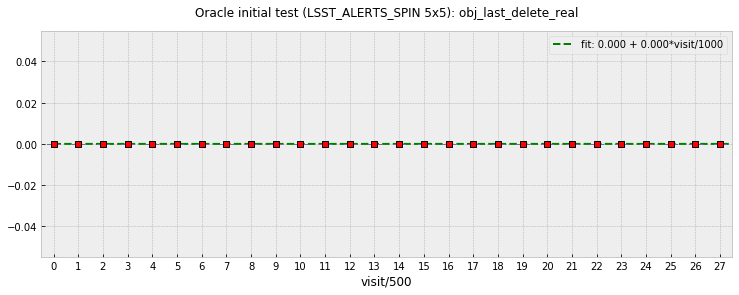

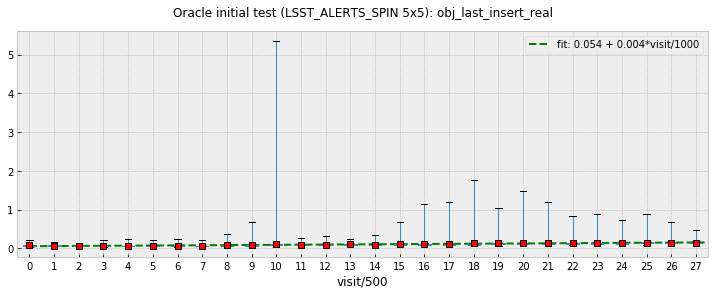

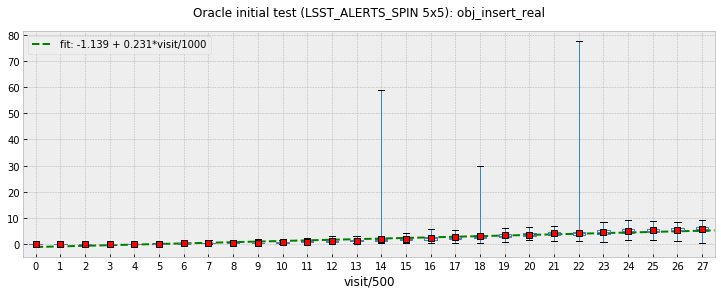

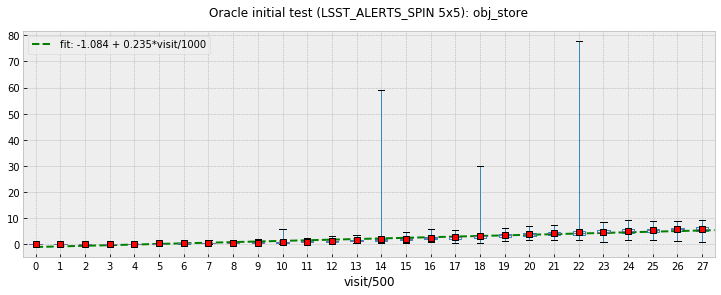

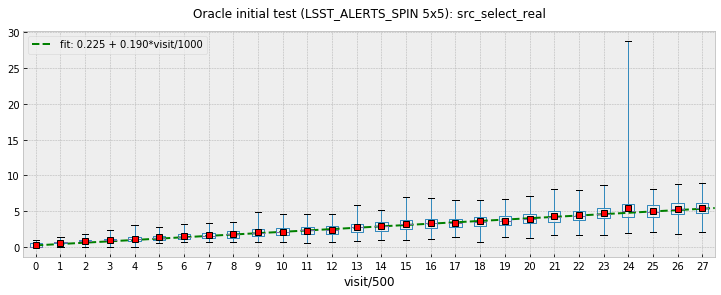

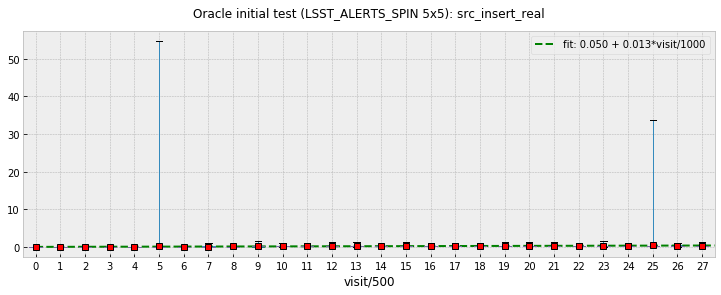

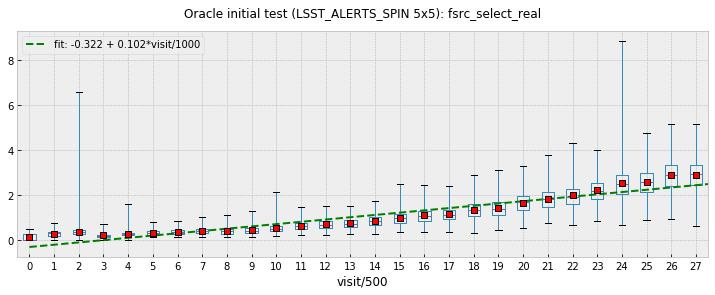

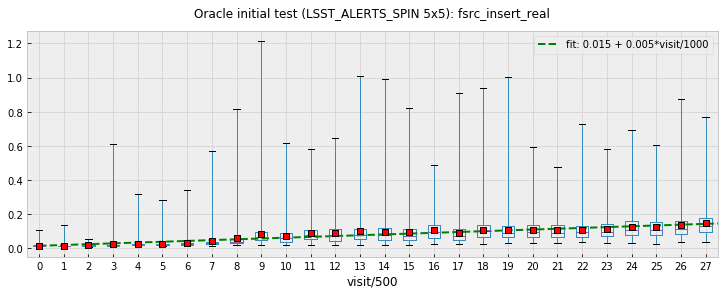

In [7]:
ds = plots.do_plots_all("data/dm-14712-oracle-spin-5x5.csv.gz", "Oracle initial test (LSST_ALERTS_SPIN 5x5)",
                        bin=500, filter_count=True)

## Continue SSD testing with 5x5 tiling

- This includes 2000 visits from the above test
- Main improvement here comes from adding all DiaObjectLast columns used in SELECT to the spacial index so that all data is satisfied from index without additional reads from other segments  


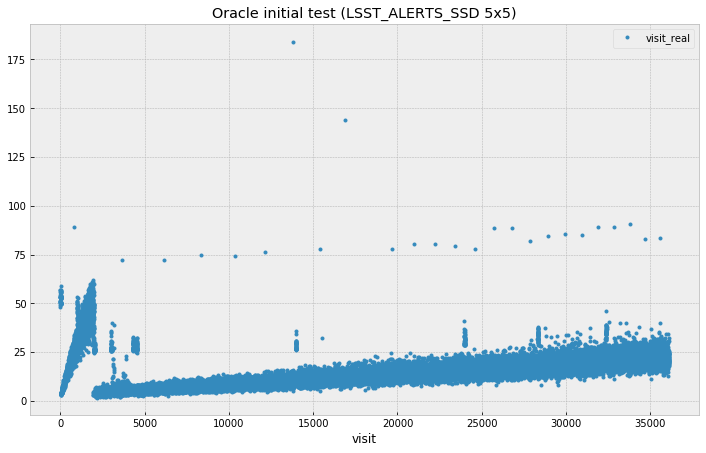

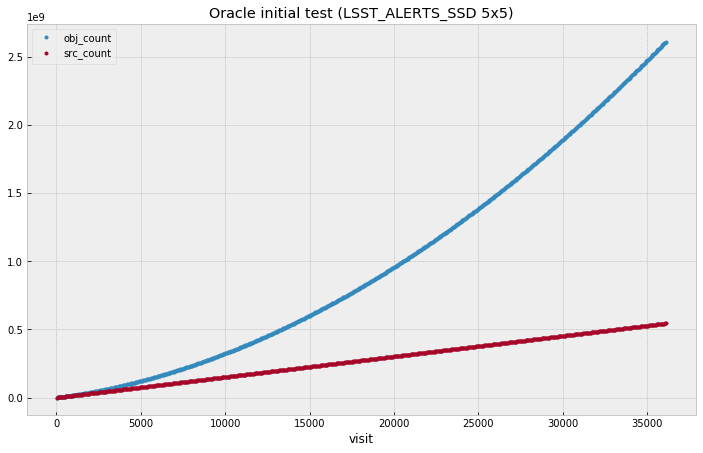

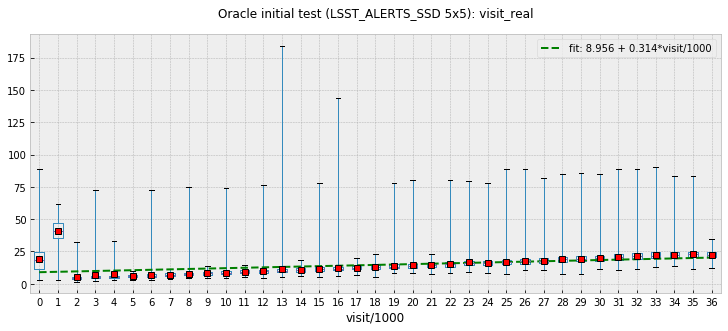

In [8]:
ds = plots.do_plots("data/dm-14712-oracle-ssd-5x5-3.csv.gz", "Oracle initial test (LSST_ALERTS_SSD 5x5)",
                    bin=1000, filter_count=True, bad_visits=[1073])

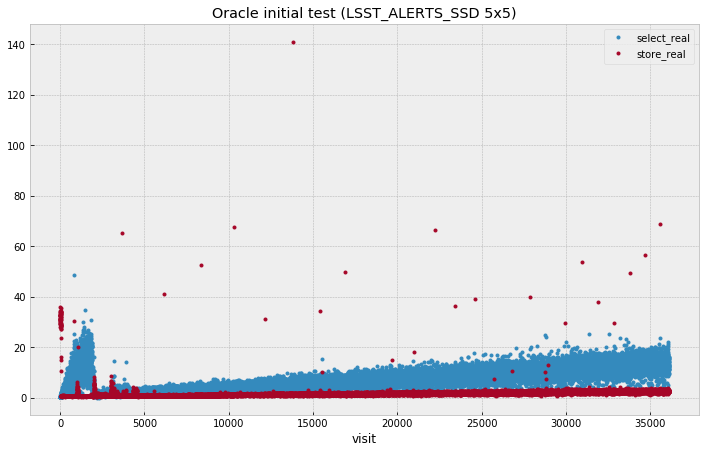

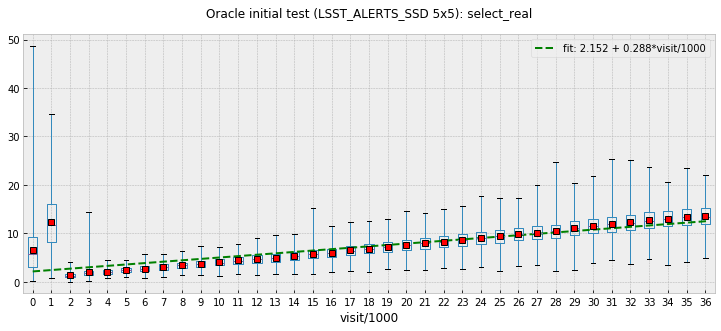

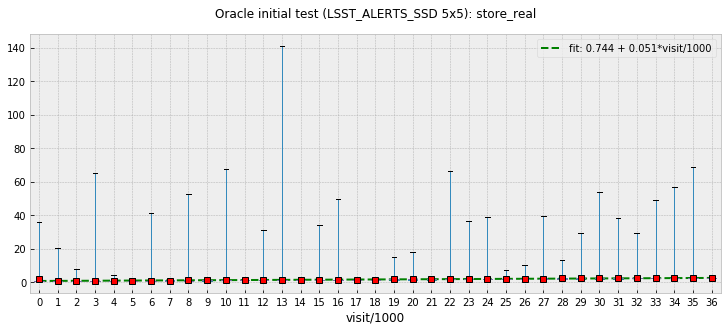

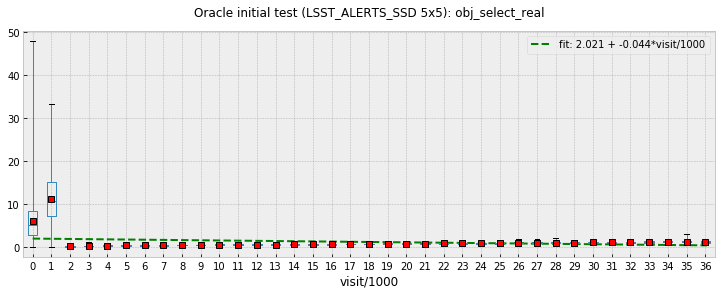

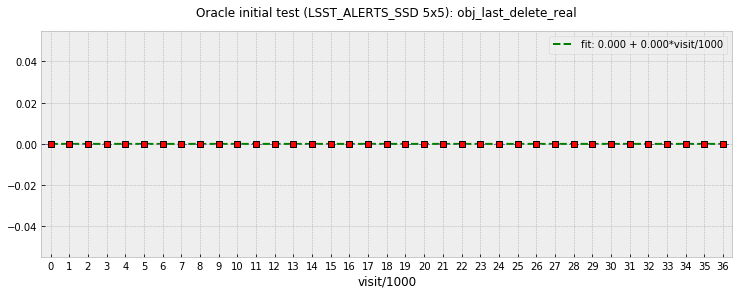

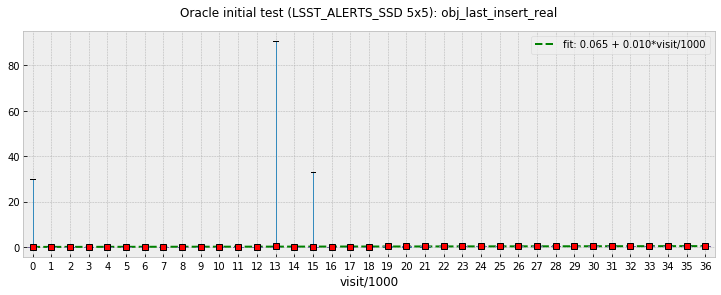

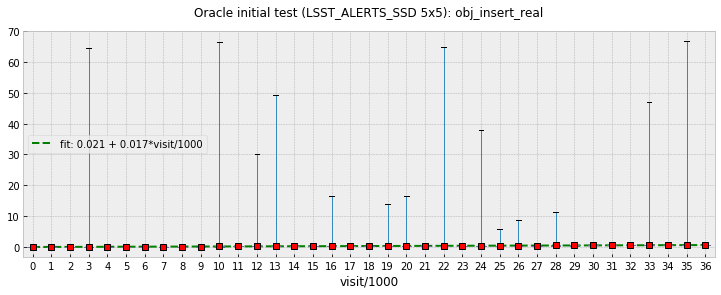

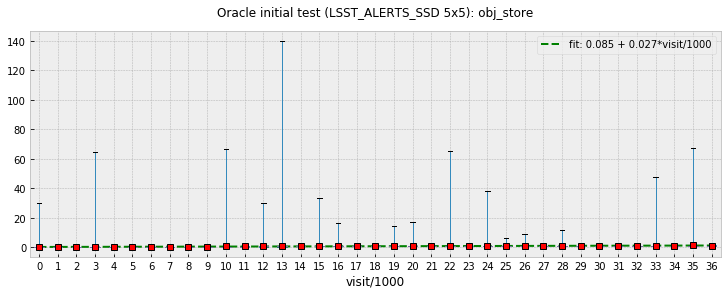

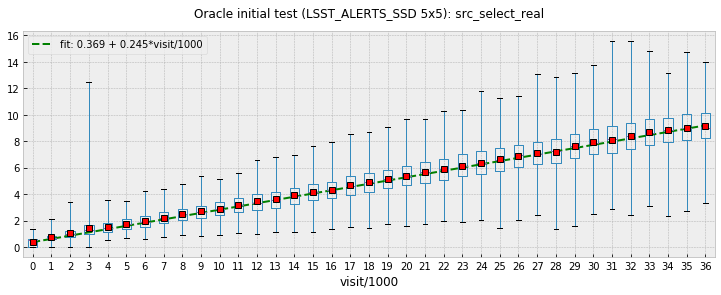

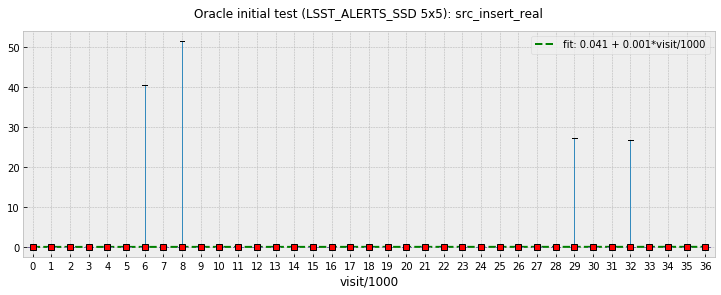

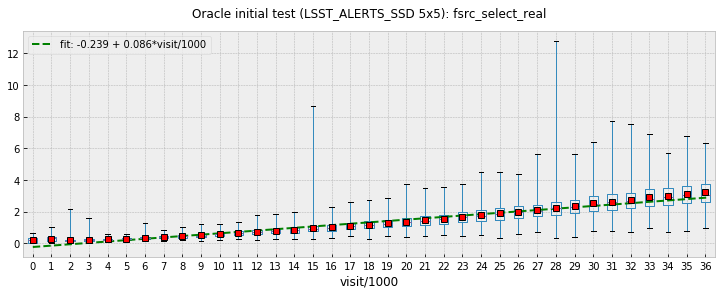

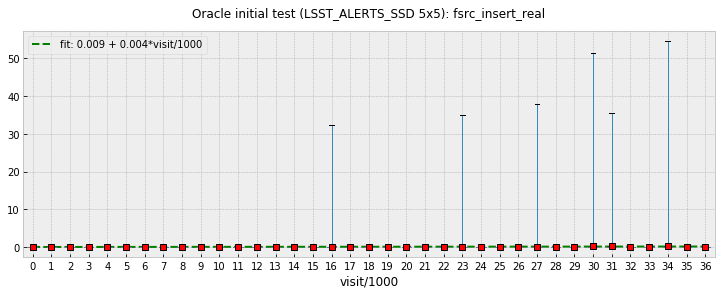

In [9]:
ds = plots.do_plots_all("data/dm-14712-oracle-ssd-5x5-3.csv.gz", "Oracle initial test (LSST_ALERTS_SSD 5x5)",
                        bin=1000, filter_count=True)

## Switching to 15x15 tiling

This is the first attempt, test was moved to verification farm, using single node.

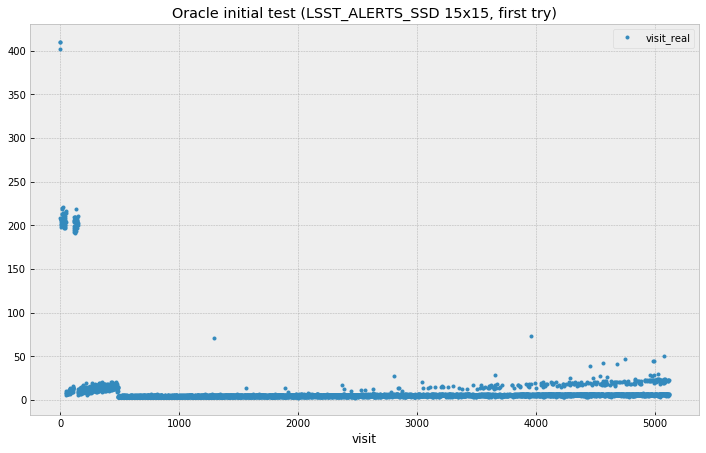

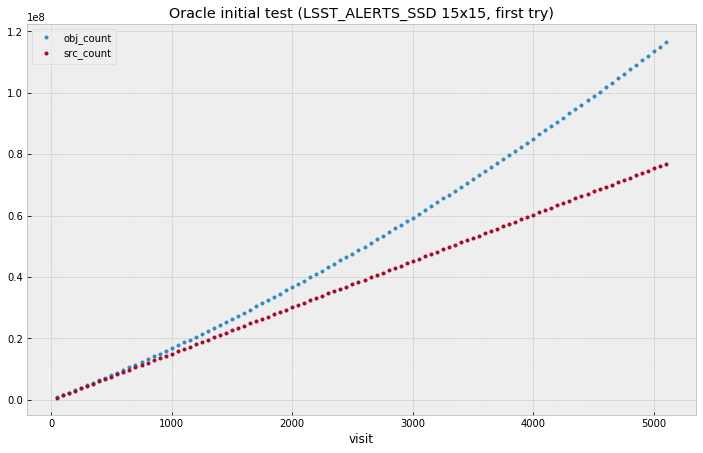

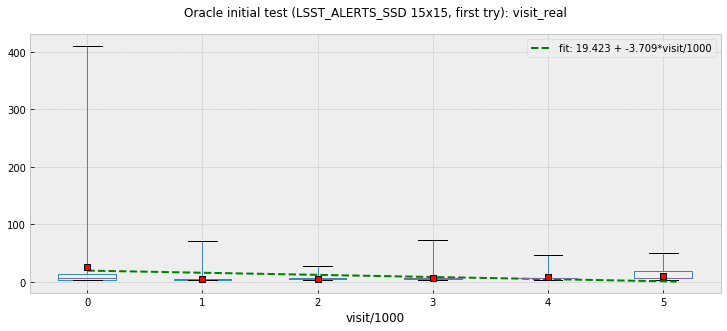

In [11]:
ds = plots.do_plots("data/dm-14712-oracle-ssd-15x15-0.csv.gz", "Oracle initial test (LSST_ALERTS_SSD 15x15, first try)",
                    bin=1000, filter_count=True)

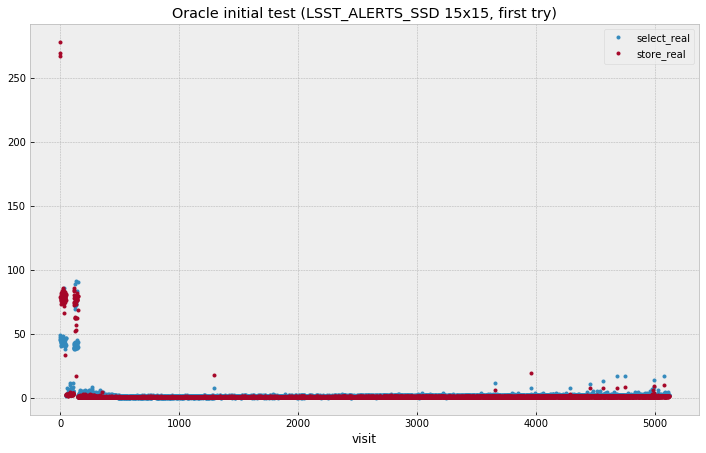

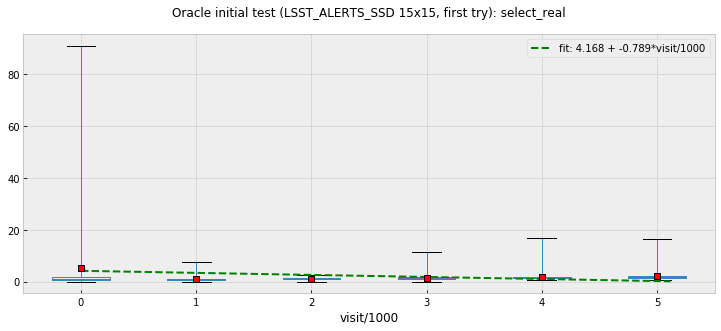

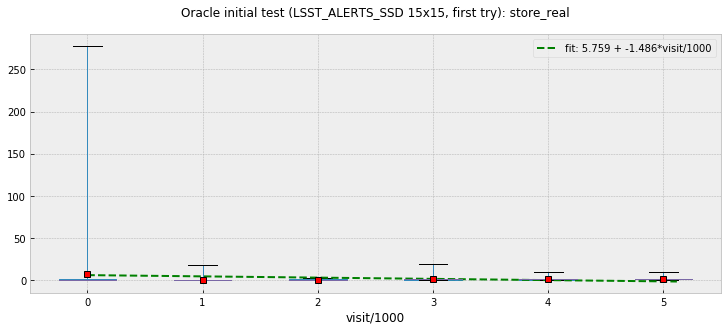

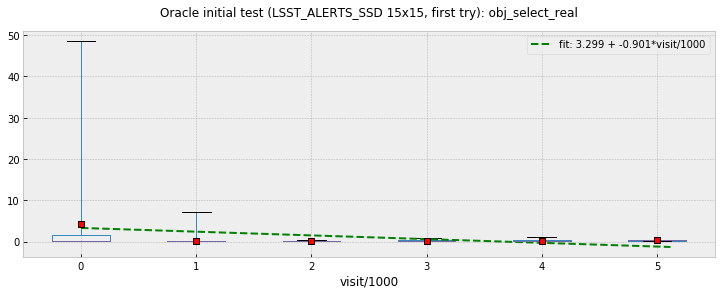

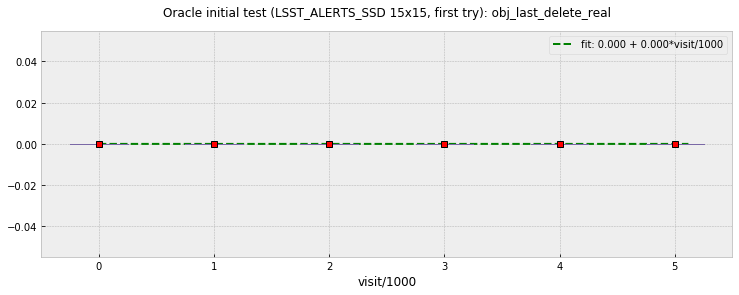

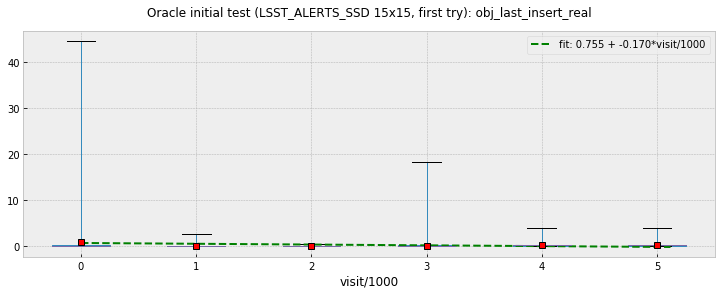

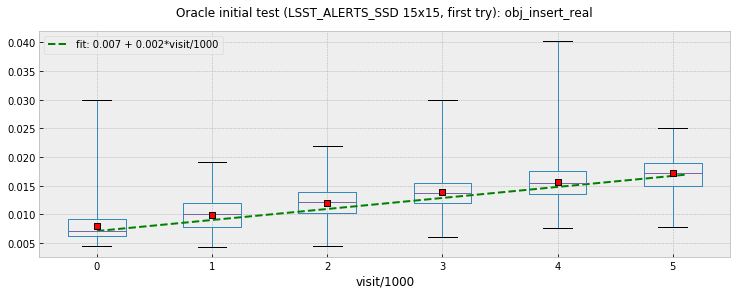

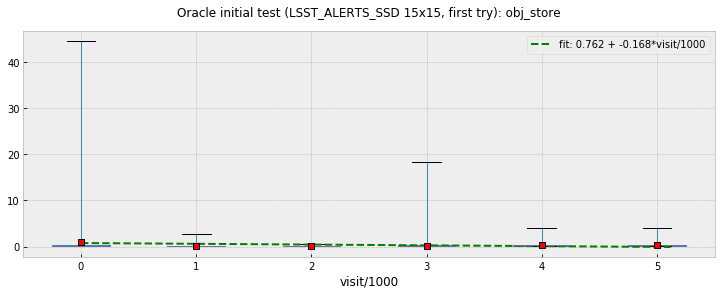

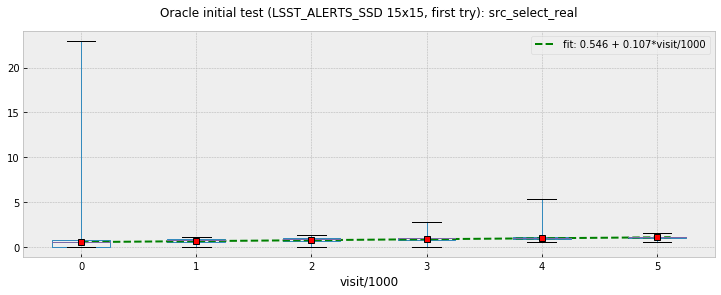

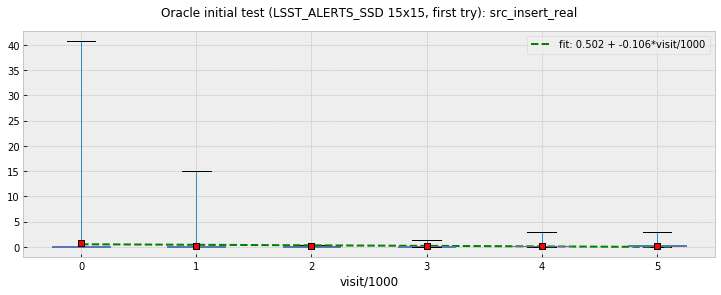

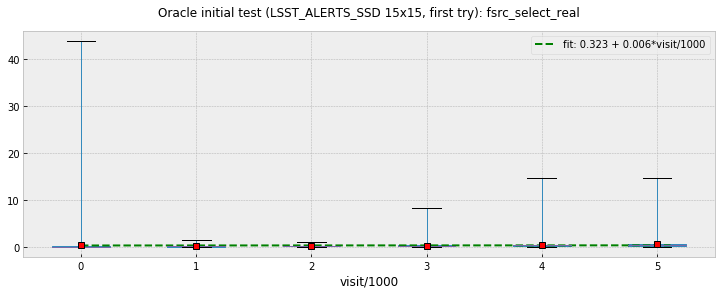

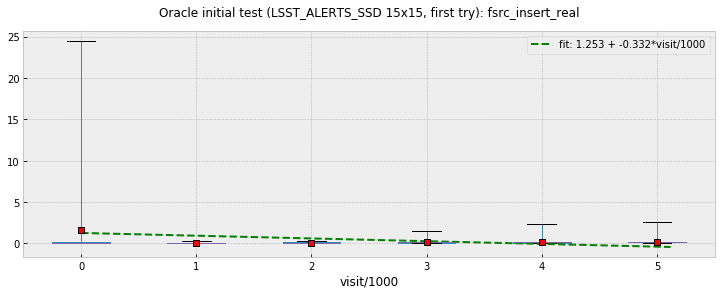

In [12]:
ds = plots.do_plots_all("data/dm-14712-oracle-ssd-15x15-0.csv.gz", "Oracle initial test (LSST_ALERTS_SSD 15x15, first try)",
                        bin=1000, filter_count=True)

## 15x15 without schema discovery

For some reason reading metadata from database was problematic, all those spikes above are apparently due to that. Avoiding reading schema from database by justbuilding the same schema as one we use to create tables.

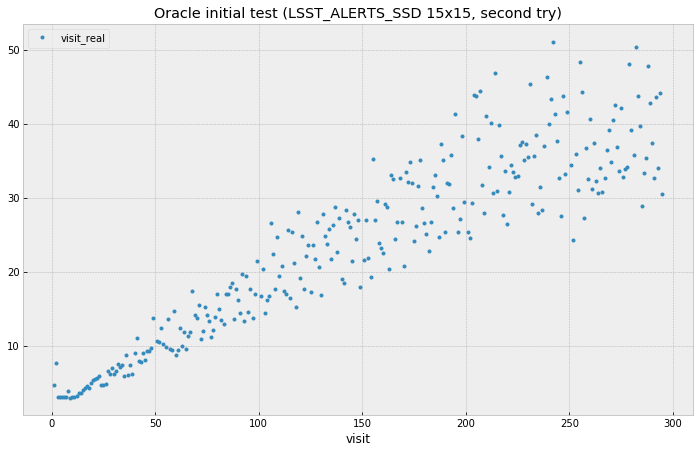

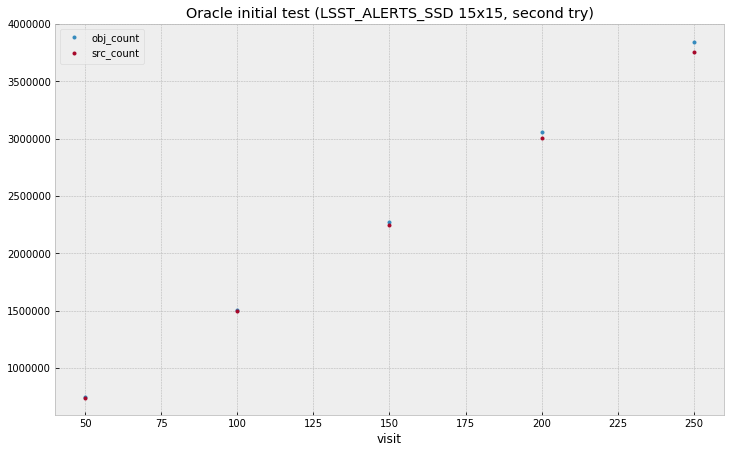

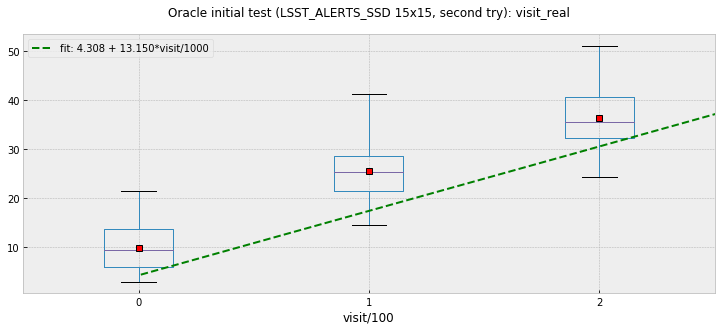

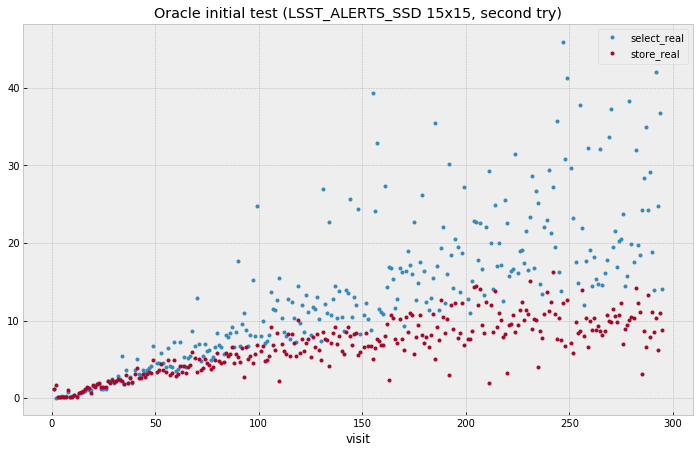

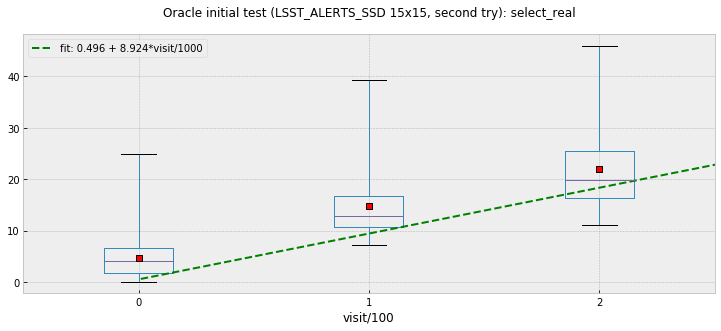

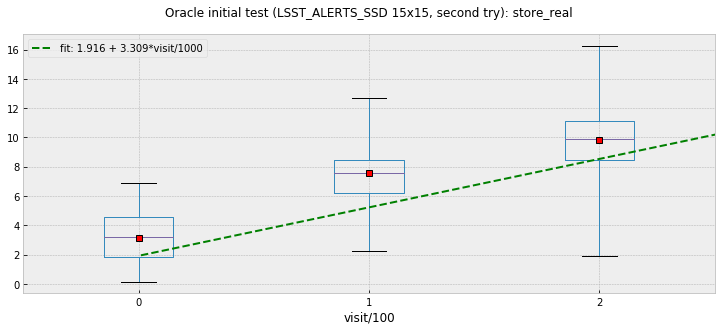

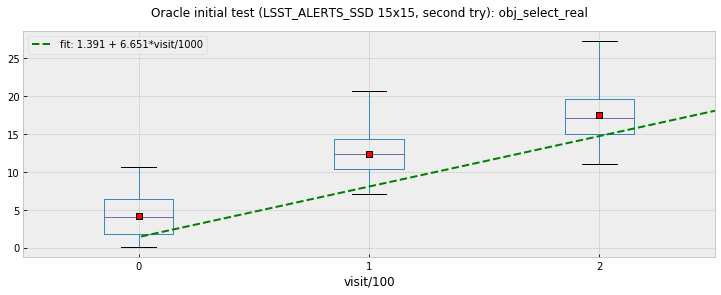

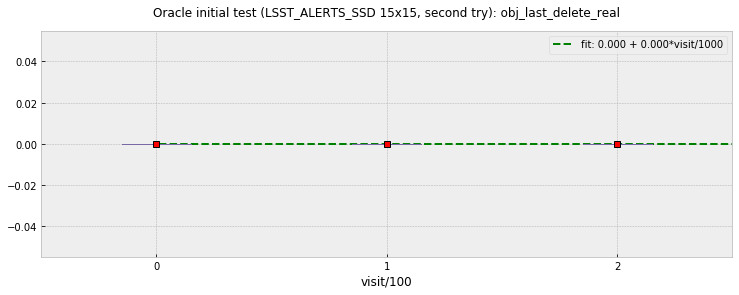

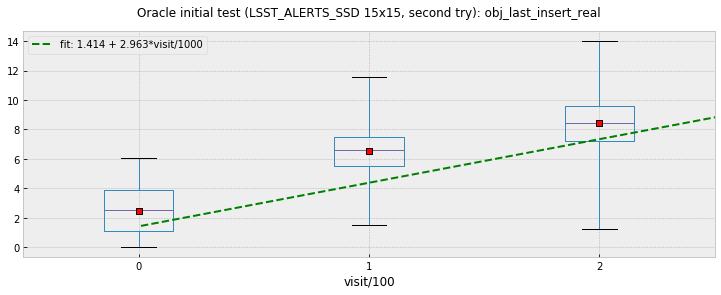

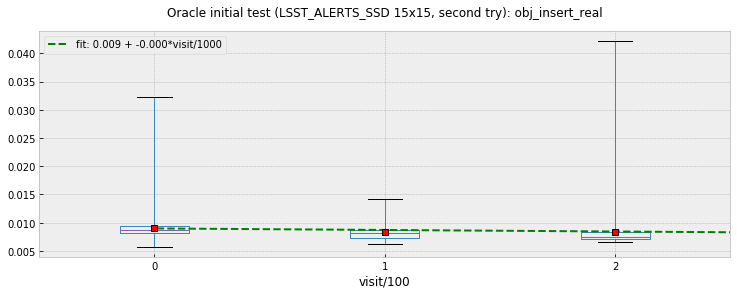

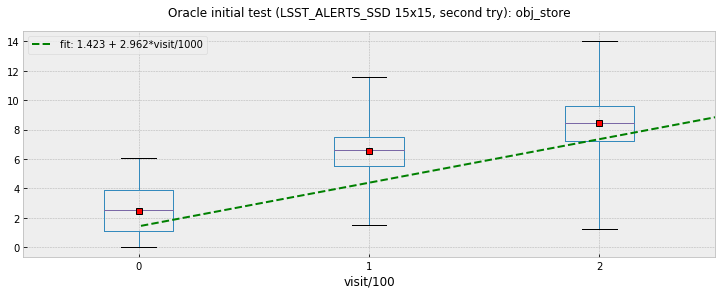

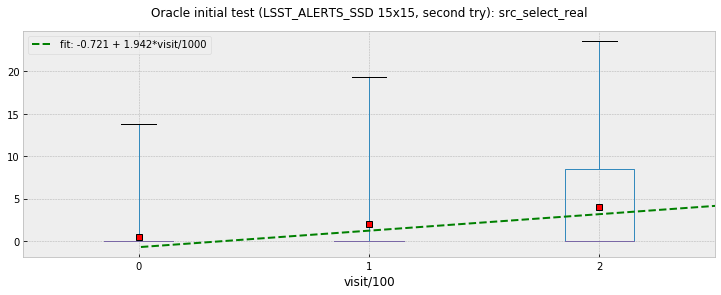

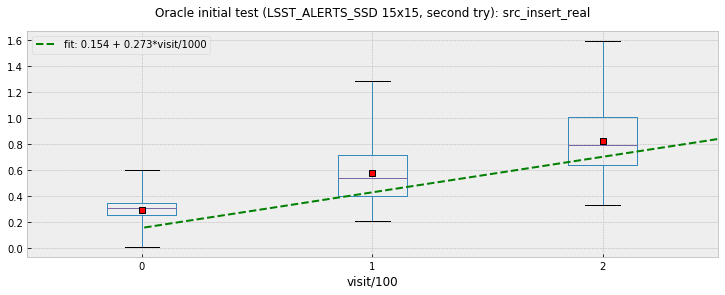

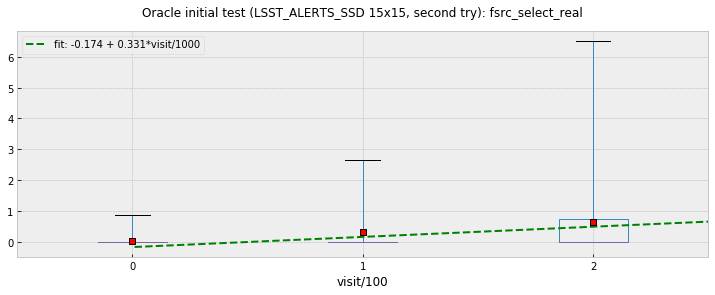

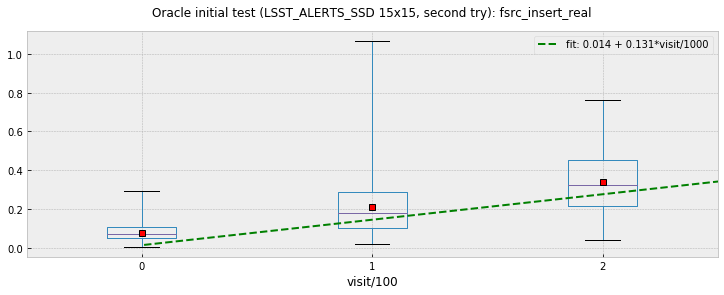

In [16]:
ds = plots.do_plots("data/dm-14712-oracle-ssd-15x15-1.csv.gz", "Oracle initial test (LSST_ALERTS_SSD 15x15, second try)",
                    bin=100, filter_count=True)
ds = plots.do_plots_all("data/dm-14712-oracle-ssd-15x15-1.csv.gz", "Oracle initial test (LSST_ALERTS_SSD 15x15, second try)",
                        bin=100, filter_count=True)